# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [26]:
cities

['port-gentil',
 'albany',
 'cabo san lucas',
 'mogadishu',
 'pisco',
 'isle of lewis',
 'egilsstadir',
 'xique xique',
 'vangaindrano',
 'praia da vitoria',
 'sampit',
 'saint-joseph',
 'chui',
 'port elizabeth',
 'enewetak',
 'puerto natales',
 'iqaluit',
 'qaqortoq',
 'vernon',
 'baiyin',
 'port-aux-francais',
 'san antonio de pale',
 'adamstown',
 'urengoy',
 'yei',
 'la ronge',
 'tazovsky',
 'tranovaho',
 'anadyr',
 'olonkinbyen',
 'lebu',
 'karbala',
 'vadso',
 'mo i rana',
 'guerrero negro',
 'flying fish cove',
 'jiangyou',
 'waitangi',
 'aleysk',
 'colonia',
 'fale old settlement',
 'vorkuta',
 'zheleznogorsk-ilimskiy',
 'grytviken',
 'punta arenas',
 'papatowai',
 'ilulissat',
 'tralee',
 'mar del plata',
 'rawah',
 'bredasdorp',
 'dudinka',
 'hermanus',
 'blackmans bay',
 'coquimbo',
 'palikir - national government center',
 'dunedin',
 'yellowknife',
 'sitka',
 'hadibu',
 "kinel'",
 'stanley',
 'portland',
 "mil'kovo",
 'wailua homesteads',
 'jawf al maqbabah',
 'lagunas',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
endpoint = f'https://api.openweathermap.org/data/2.5/weather?q=port-gentil&appid={weather_api_key}'

#endpoint = f'https://api.openweathermap.org/data/2.5/weather?q={Rome}&appid={5bbdc86c20f97d7d1d50988d8c753491'
city_weather = requests.get(endpoint).json()


In [24]:
city_weather

{'coord': {'lon': 8.7815, 'lat': -0.7193},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 300.25,
  'feels_like': 303.52,
  'temp_min': 300.25,
  'temp_max': 300.25,
  'pressure': 1009,
  'humidity': 84,
  'sea_level': 1009,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 2.26, 'deg': 179, 'gust': 2.45},
 'rain': {'1h': 0.92},
 'clouds': {'all': 97},
 'dt': 1683690995,
 'sys': {'country': 'GA', 'sunrise': 1683695924, 'sunset': 1683739433},
 'timezone': 3600,
 'id': 2396518,
 'name': 'Port-Gentil',
 'cod': 200}

In [47]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]
    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        City.append(city)
        Lat.append(city_lat)
        Lng.append(city_lng)
        Max_Temp.append(city_max_temp)
        Humidity.append(city_humidity)
        Cloudiness.append(city_clouds)
        Wind_Speed.append(city_wind)
        Country.append(city_country)
        Date.append(city_date)
        
        
        
        #city_data.append({"City": city, 
         #                 "Lat": city_lat, 
          #                "Lng": city_lng, 
           #               "Max_Temp": city_max_temp,
            #              "Humidity": city_humidity,
             #             "Cloudiness": city_clouds,
              #            "Wind_Speed": city_wind,
               #           "Country": city_country,
                #          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-gentil
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | mogadishu
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 7 of Set 1 | egilsstadir
Processing Record 8 of Set 1 | xique xique
Processing Record 9 of Set 1 | vangaindrano
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | sampit
Processing Record 12 of Set 1 | saint-joseph
Processing Record 13 of Set 1 | chui
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | vernon
Processing Record 20 of Set 1 | baiyin
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 

Processing Record 38 of Set 4 | uturoa
Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | crane
Processing Record 41 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 42 of Set 4 | victoria point
Processing Record 43 of Set 4 | balakhta
Processing Record 44 of Set 4 | nova xavantina
Processing Record 45 of Set 4 | lanivtsi
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | redencao
Processing Record 48 of Set 4 | keflavik
Processing Record 49 of Set 4 | shibetsu
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | manacapuru
Processing Record 2 of Set 5 | cachoeirinha
Processing Record 3 of Set 5 | rundu
Processing Record 4 of Set 5 | kelibia
Processing Record 5 of Set 5 | n'diareme limamoulaye
City not found. Skipping...
Processing Record 6 of Set 5 | mataram
Processing Record 7 of Set 5 | male
Processing Record 8 of Set 5 | whitby
Processing Record 9 of Set 5 | carrizo springs
Processing Record 10 of

Processing Record 27 of Set 8 | saint-philippe
Processing Record 28 of Set 8 | happy valley-goose bay
Processing Record 29 of Set 8 | gazojak
Processing Record 30 of Set 8 | mastung
Processing Record 31 of Set 8 | nuevo ideal
Processing Record 32 of Set 8 | tobi village
City not found. Skipping...
Processing Record 33 of Set 8 | reggane
Processing Record 34 of Set 8 | kas
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | belyy yar
Processing Record 37 of Set 8 | verkhnevilyuysk
Processing Record 38 of Set 8 | villa ojo de agua
Processing Record 39 of Set 8 | kapuskasing
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | tyre
Processing Record 42 of Set 8 | sitia
Processing Record 43 of Set 8 | roosevelt
Processing Record 44 of Set 8 | bucerias
Processing Record 45 of Set 8 | misratah
Processing Record 46 of Set 8 | mejit
Processing Record 47 of Set 8 | yuzhno-kurilsk
Processing Record 48 of Set 8 | gokwe
Processing Record 49 of Set 8 | 

Processing Record 15 of Set 12 | boma
Processing Record 16 of Set 12 | inirida
Processing Record 17 of Set 12 | ahiri
Processing Record 18 of Set 12 | sakakah
Processing Record 19 of Set 12 | burutu
Processing Record 20 of Set 12 | midar
Processing Record 21 of Set 12 | bani walid
Processing Record 22 of Set 12 | bairnsdale
Processing Record 23 of Set 12 | aswan
Processing Record 24 of Set 12 | elverum
Processing Record 25 of Set 12 | merizo village
Processing Record 26 of Set 12 | bhadra
Processing Record 27 of Set 12 | tangalle
Processing Record 28 of Set 12 | bakanas
Processing Record 29 of Set 12 | waiuku
Processing Record 30 of Set 12 | doaba
Processing Record 31 of Set 12 | tzucacab
Processing Record 32 of Set 12 | sao jose da coroa grande
Processing Record 33 of Set 12 | taulaga
Processing Record 34 of Set 12 | lohaghat
Processing Record 35 of Set 12 | port macquarie
Processing Record 36 of Set 12 | ishikawa
Processing Record 37 of Set 12 | mukhorshibir'
City not found. Skipping

In [43]:
City

[]

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": City, 
    "Lat": Lat, 
    "Lng": Lng, 
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
})
# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.7193,8.7815,26.99,83,97,2.12,GA,1683693781
1,albany,42.6001,-73.9662,8.23,63,2,0.89,US,1683693686
2,cabo san lucas,22.8909,-109.9124,25.61,74,14,6.52,MX,1683693548
3,mogadishu,2.0371,45.3438,27.93,83,40,5.14,SO,1683693782
4,pisco,-13.7000,-76.2167,20.03,83,75,4.12,PE,1683693782


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,26.99,83,97,2.12,GA,1683693781
1,albany,42.6001,-73.9662,8.23,63,2,0.89,US,1683693686
2,cabo san lucas,22.8909,-109.9124,25.61,74,14,6.52,MX,1683693548
3,mogadishu,2.0371,45.3438,27.93,83,40,5.14,SO,1683693782
4,pisco,-13.7000,-76.2167,20.03,83,75,4.12,PE,1683693782


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

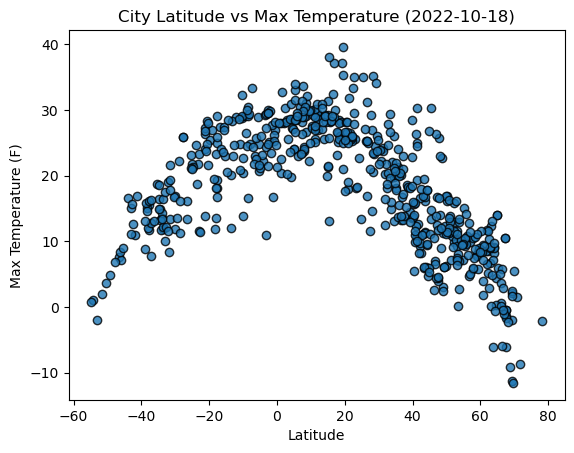

In [59]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

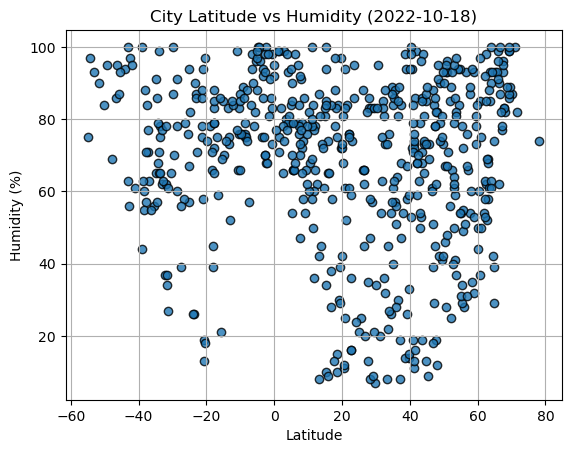

In [60]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

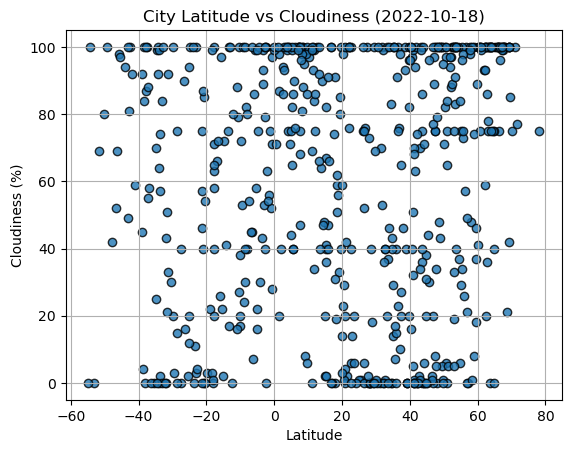

In [61]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

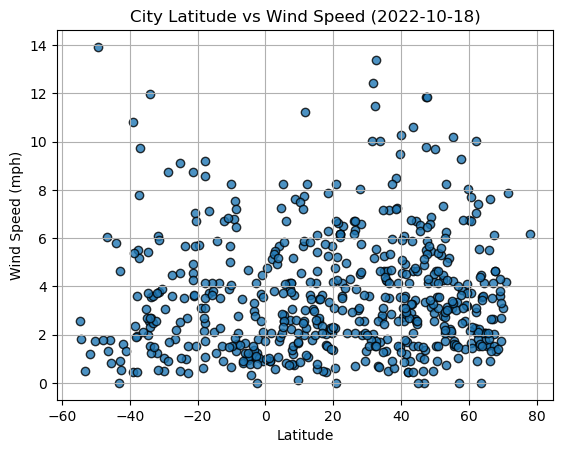

In [62]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    plt.scatter(x_values, y_values, linewidth=1)
    plt.plot(x_values,regress_values,color='r')
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq, text_coordinates, color="red")

In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,8.23,63,2,0.89,US,1683693686
2,cabo san lucas,22.8909,-109.9124,25.61,74,14,6.52,MX,1683693548
3,mogadishu,2.0371,45.3438,27.93,83,40,5.14,SO,1683693782
5,egilsstadir,65.2653,-14.3948,5.95,93,100,1.54,IS,1683693783
8,praia da vitoria,38.7333,-27.0667,18.20,94,40,7.23,PT,1683693784


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,26.99,83,97,2.12,GA,1683693781
4,pisco,-13.7000,-76.2167,20.03,83,75,4.12,PE,1683693782
6,xique xique,-10.8217,-42.7311,24.85,66,79,3.88,BR,1683693783
7,vangaindrano,-23.3500,47.6000,21.75,90,11,0.99,MG,1683693784
9,sampit,-2.5333,112.9500,30.03,68,100,1.22,ID,1683693784


###  Temperature vs. Latitude Linear Regression Plot

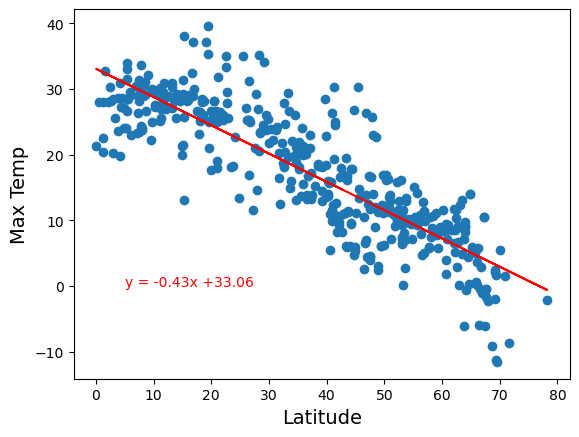

In [91]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (5, 0))


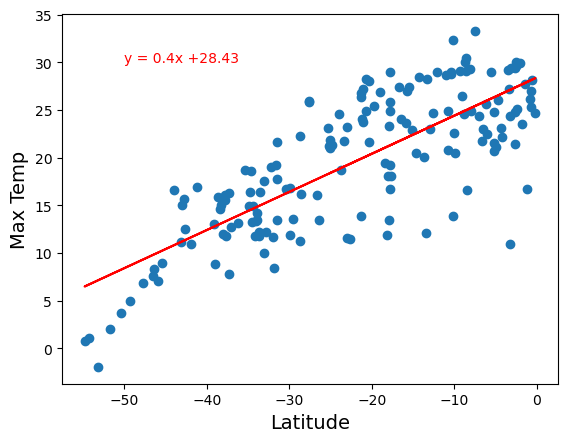

In [94]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-50, 30))



**Discussion about the linear relationship:** 

We can see that the higher the latitude, the lower the max temperature is going to be.
And the other way around, we can see that the lower the latitude, the lower the max temperature is going to be.

### Humidity vs. Latitude Linear Regression Plot

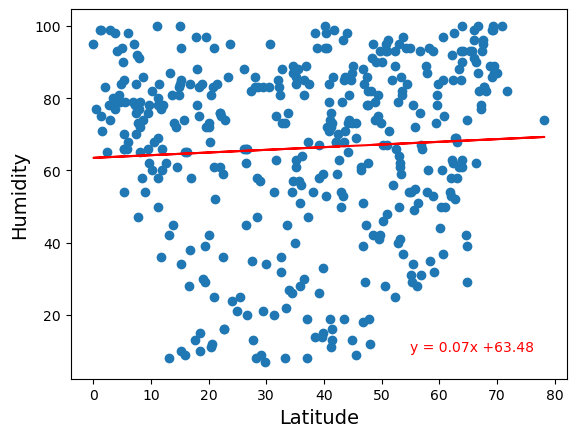

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern",(55,10))

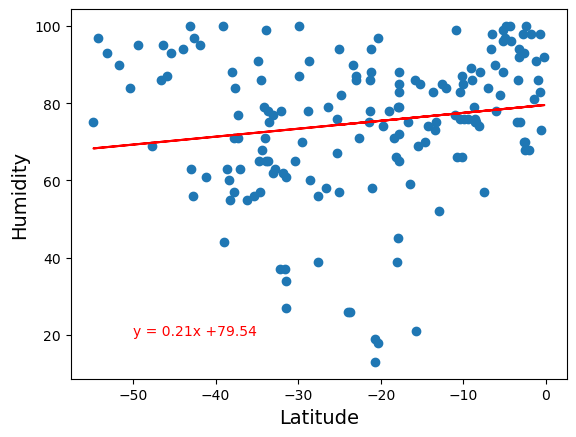

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern",(-50, 20))

**Discussion about the linear relationship:** 
Here we can see that the Latitude and the Humidity have no apparent realtionship that affect one another.

### Cloudiness vs. Latitude Linear Regression Plot

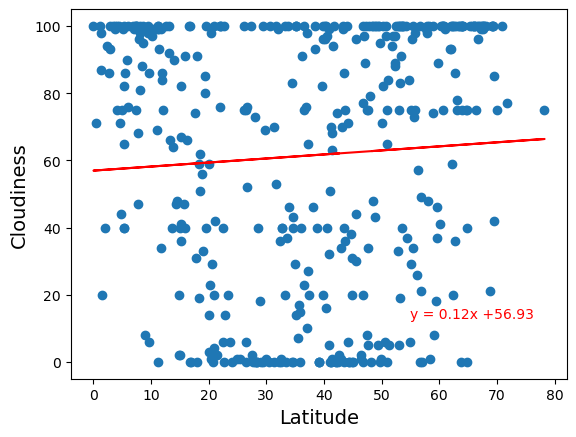

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (55, 13))

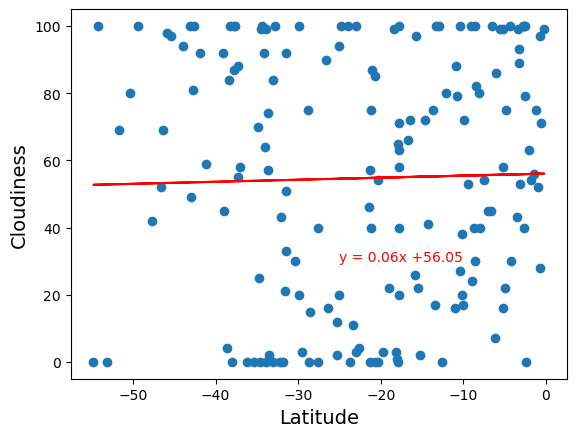

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-25, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

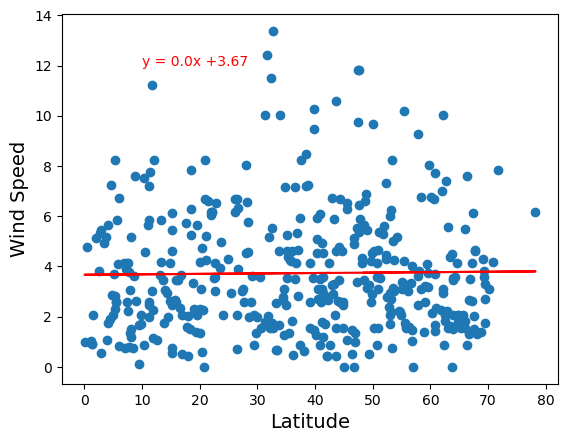

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern",(10, 12))

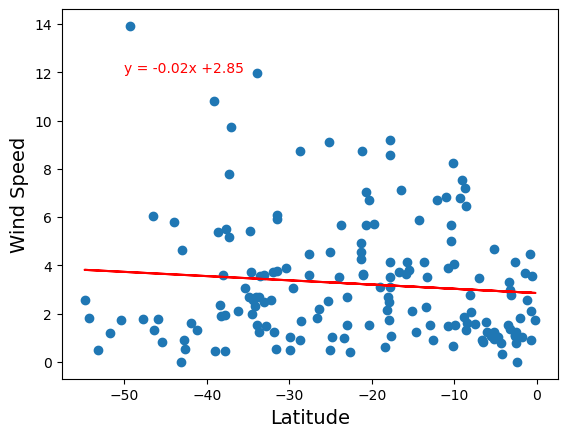

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE